In [14]:
import pandas as pd
import pydotplus as pdt
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
import numpy as np


import sklearn.metrics as metrics
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [15]:
#activity B exploratory data analysis
#activity B.1 download data set as below
df=sns.load_dataset('iris')
#df.to_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
#activity b.4 count rows & columns
countrow=df.shape[0]
countcol=df.shape[1]
print(f"count of rows = {countrow} & Count of Columns = {countcol}")

count of rows = 150 & Count of Columns = 5


In [17]:
#activity b.5
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
#activity b.6
data=df.groupby('species')['species'].count()
data

species
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species'>

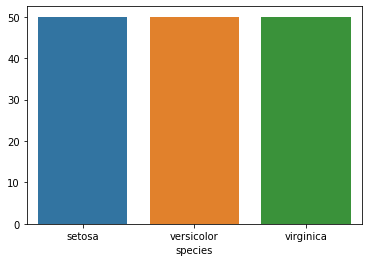

In [19]:
#activity b.7
sns.barplot(y=data.values,x=data.index)

In [20]:
#activity b.8
data.isnull().any()

False

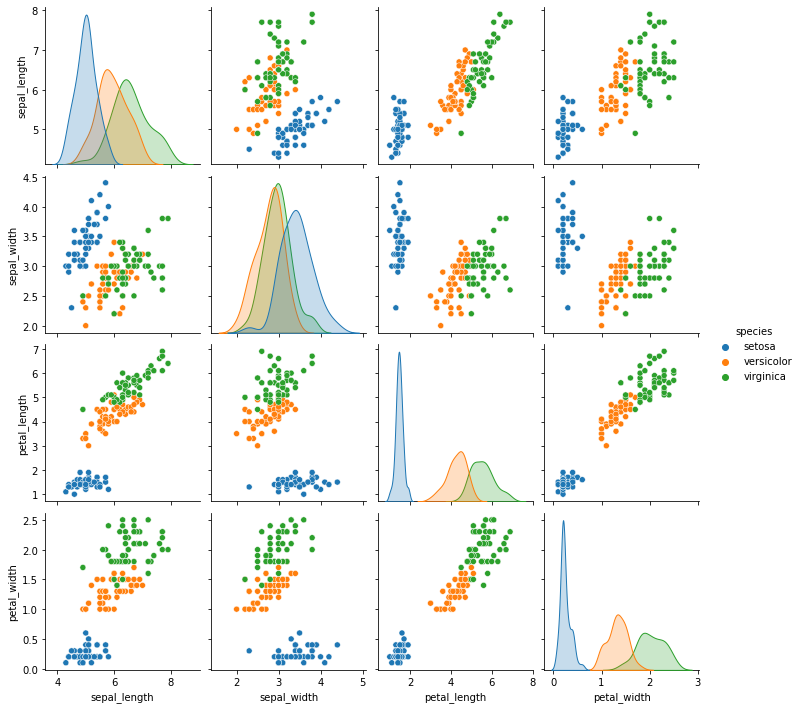

In [21]:
#activity b.9
sns.pairplot(data=df,hue='species')

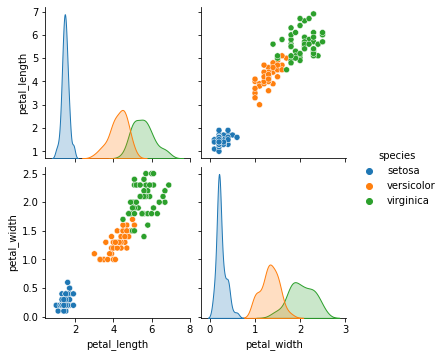

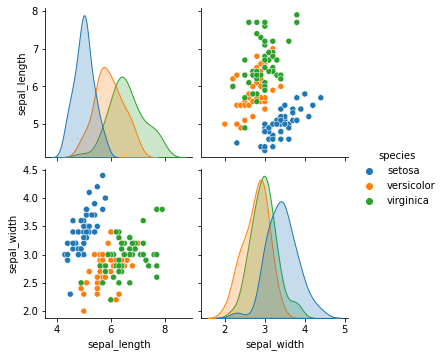

In [22]:
#activity b.9 my own attempt with a different view.
df1=df[['petal_length','petal_width','species']]
sns.pairplot(data=df1,hue='species')
df2=df[['sepal_length','sepal_width','species']]
sns.pairplot(data=df2,hue='species')

In [23]:
#activity C.1 data prep
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [24]:
#activity c.2
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [25]:
#activity c.3
#classification is stored in target attribute
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [26]:
#activity c.4
#using numpy bincount function
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

In [27]:
#activity c.5 print target names
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [70]:
#activity c.6 now fit a model to training data
clf=DecisionTreeClassifier(random_state=1234)
model=clf.fit(x,y)

In [71]:
text_representation =tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



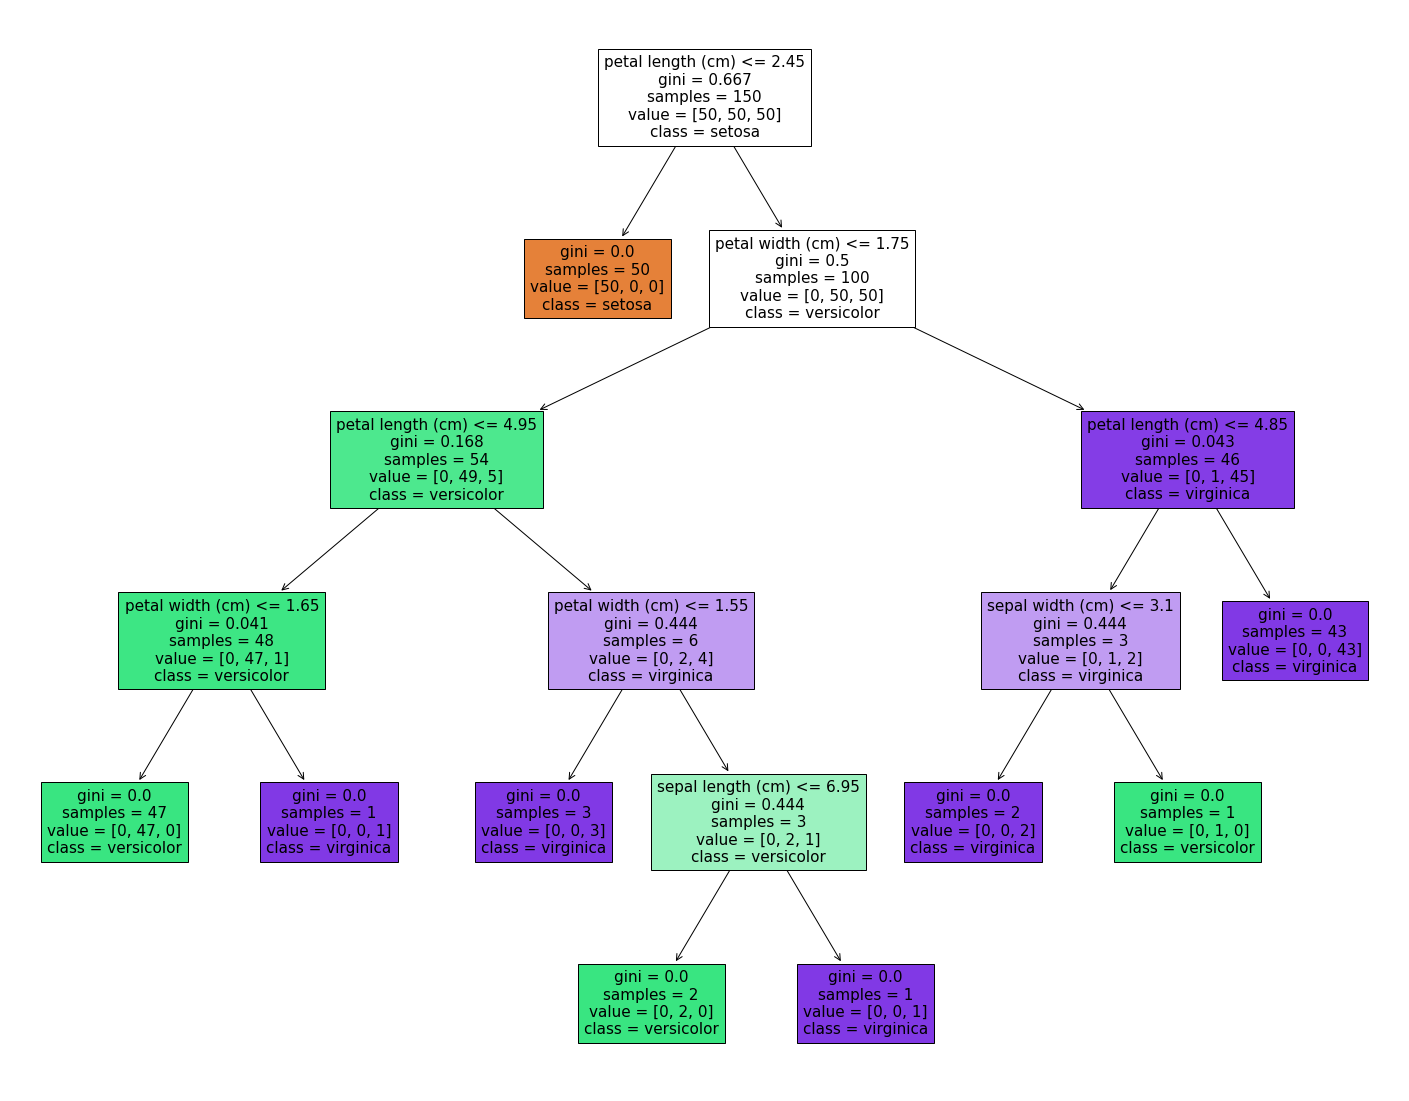

In [72]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(clf,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

In [74]:
#activity D predicting using the classification method.
#activity D.1 splitting data - 80-20 ratio
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print("training split input=",xtrain.shape)
print("testing split input=",xtest.shape)


training split input= (120, 4)
testing split input= (30, 4)


In [76]:
#activity D.2 modeling tree and testing it
dtree=DecisionTreeClassifier(random_state=1234)
model=dtree.fit(xtrain,ytrain)

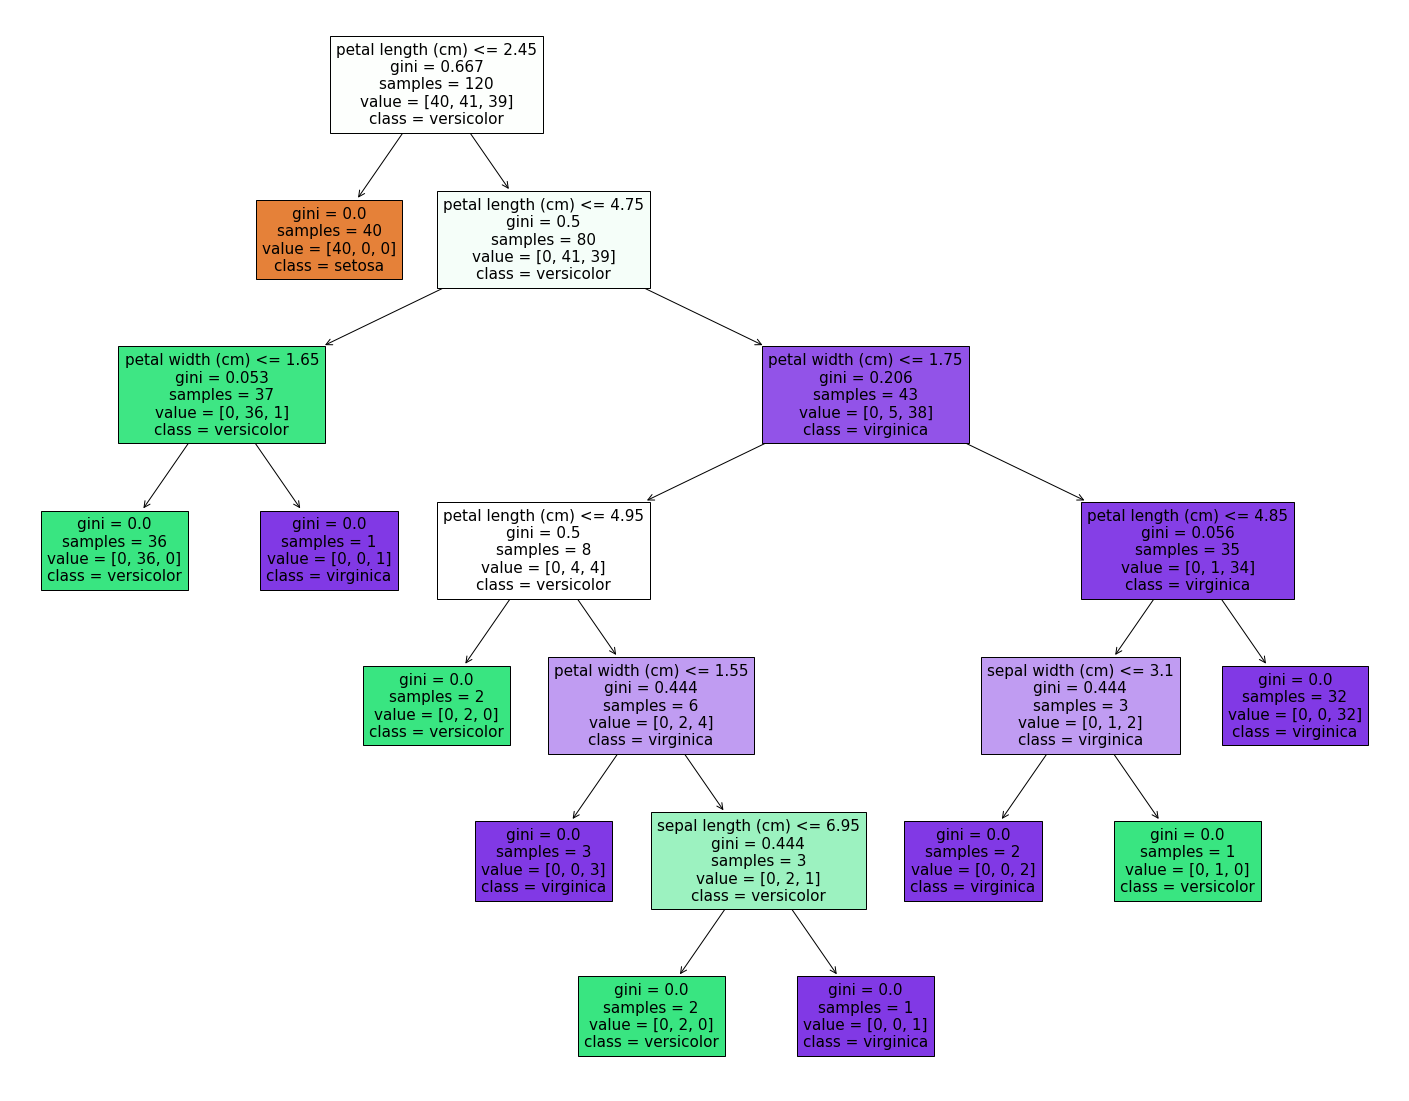

In [79]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(dtree,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

In [80]:
#activity D.3 predicting the values of test data
from sklearn.metrics import classification_report
ypred=dtree.predict(xtest)
print("classification report=\n",classification_report(ytest,ypred))

classification report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
###Activity C.1 covered in workshop with osamah.
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import datasets

iris=pd.read_csv('iris.csv')
x1=iris.drop(columns=['species']) # dropped one column and saved rest in x1 , represents the features
y1=iris['species'] # the column we dropped above imported into y1 -- this wil be class lables


#Training decision tree on  classification task 
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.20)
clf= DecisionTreeClassifier()
model=clf.fit(x1_train,y1_train)
pre=model.predict(x1_test)
print("accuracy", metrics.accuracy_score(y1_test,pre))